In [1]:
import os, sys
notebook_dir = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(notebook_dir, "..")))
import pandas as pd

In [2]:
from scripts.visualization import plot_moving_averages
from scripts.data_loading import stock_data
from scripts.data_analysis import calculate_movig_avg
from scripts.data_analysis import calculate_rsi
from scripts.visualization import plot_rsi
from scripts.data_analysis import calculate_MACD
from scripts.visualization import plot_macd
from scripts.visualization import plot_macd_with_signals
from scripts.data_analysis import compute_indicators
from scripts.visualization import plot_indicators

In [3]:
# File paths
file_paths = [
    '../data/yfinance_data/AAPL_historical_data.csv',
    '../data/yfinance_data/AMZN_historical_data.csv',
    '../data/yfinance_data/GOOG_historical_data.csv',
    '../data/yfinance_data/META_historical_data.csv',
    '../data/yfinance_data/MSFT_historical_data.csv',
    '../data/yfinance_data/NVDA_historical_data.csv',
    '../data/yfinance_data/TSLA_historical_data.csv',
]
raw_ratings_path = '../data/raw_analyst_ratings.csv'

In [4]:
# Load data
appl_data = stock_data("../data/yfinance_data/AAPL_historical_data.csv")

In [5]:
appl_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [6]:
appl_data.duplicated().sum()

np.int64(0)

In [7]:
appl_data["Moving Average"] = calculate_movig_avg(appl_data["Close"],window=5)

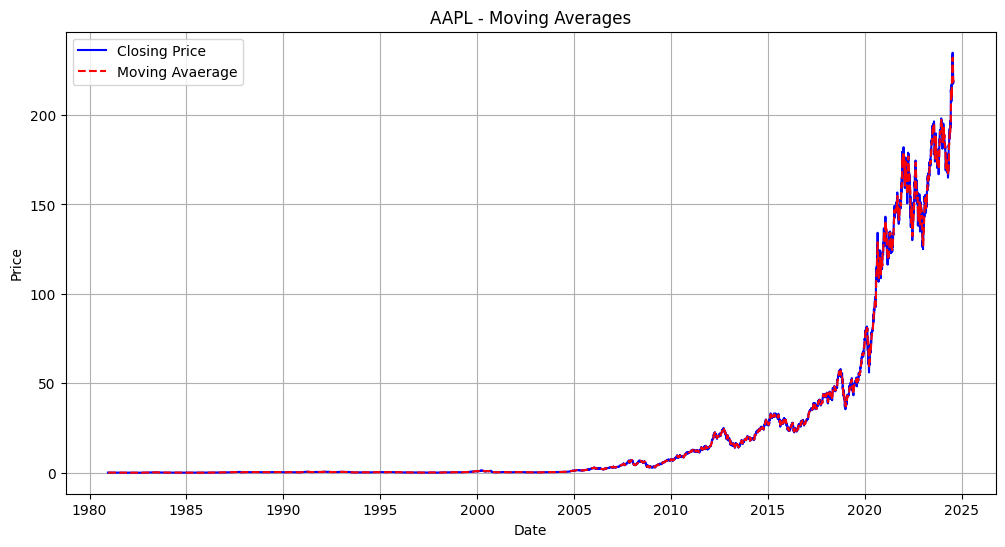

In [8]:
plot_moving_averages(appl_data,"AAPL")

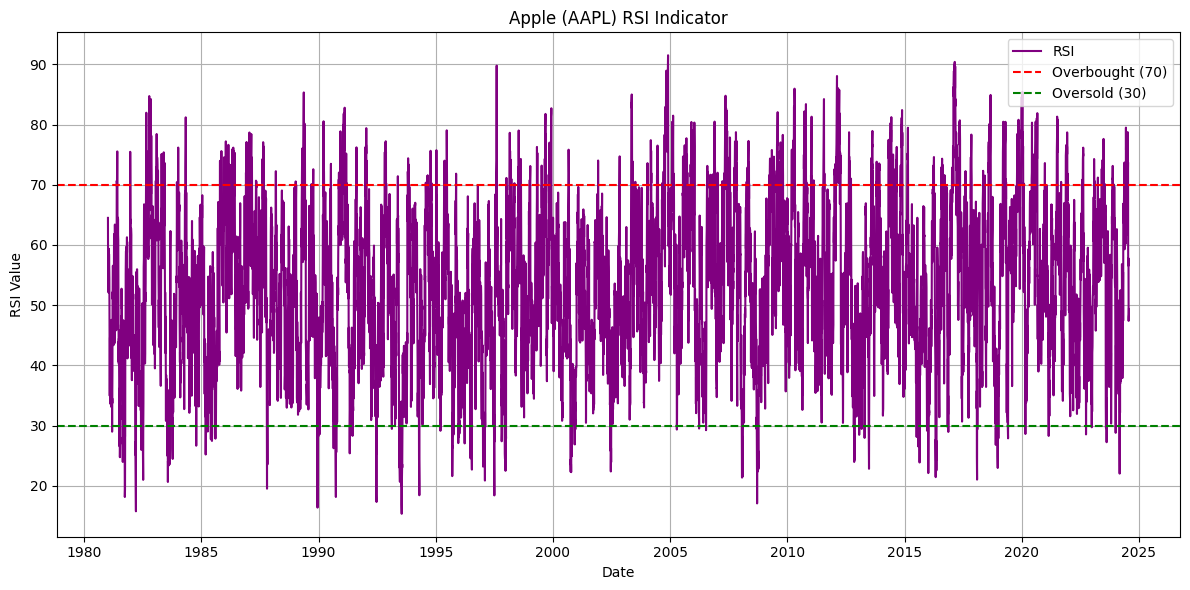

In [9]:
# Calculate RSI
aapl_data = calculate_rsi(appl_data,14)

# Plot RSI
plot_rsi(aapl_data, title="Apple (AAPL) RSI Indicator")

In [10]:
Amzn_data=stock_data('../data/yfinance_data/AMZN_historical_data.csv')

In [11]:
Amzn_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0


In [12]:
Amzn_data["Moving Average"] = calculate_movig_avg(Amzn_data["Close"],window=5)

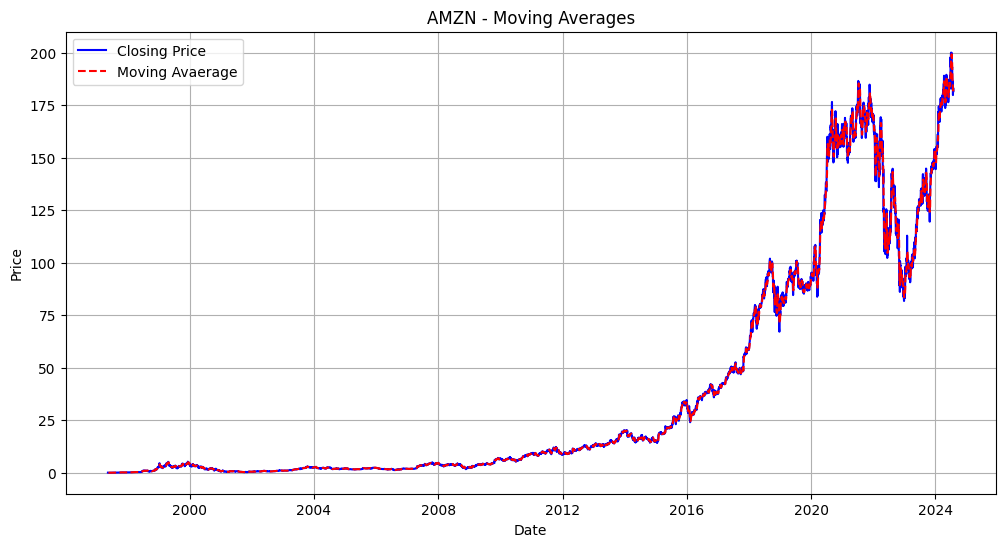

In [13]:
plot_moving_averages(Amzn_data,"AMZN")

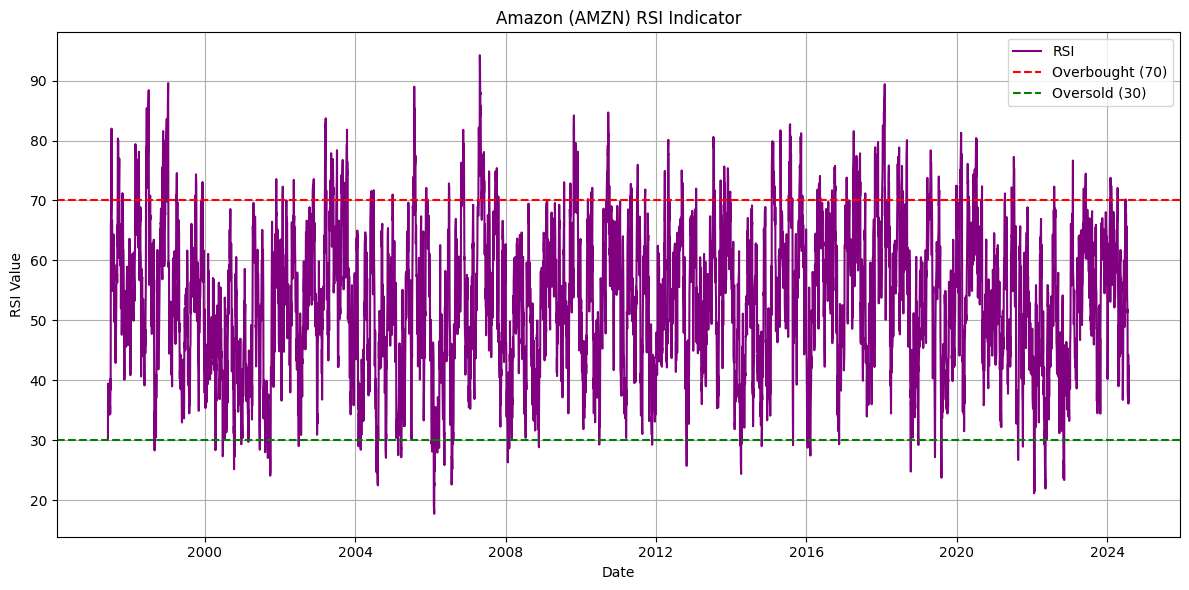

In [14]:
# Calculate RSI
amzn_d = calculate_rsi(Amzn_data,14)

# Plot RSI
plot_rsi(Amzn_data, title="Amazon (AMZN) RSI Indicator")

In [24]:
appl_comp = compute_indicators(appl_data)
appl_comp = appl_comp.iloc[-1000:]

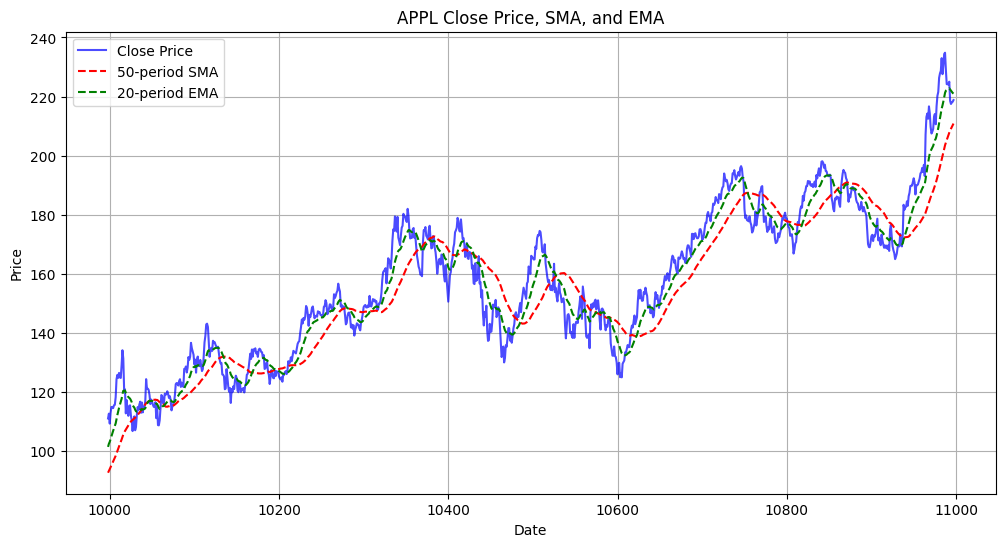

In [25]:
plot_indicators(appl_comp,"APPL")

In [26]:
amzn_comp = compute_indicators(Amzn_data)
amzn_comp = amzn_comp.iloc[-1000:]

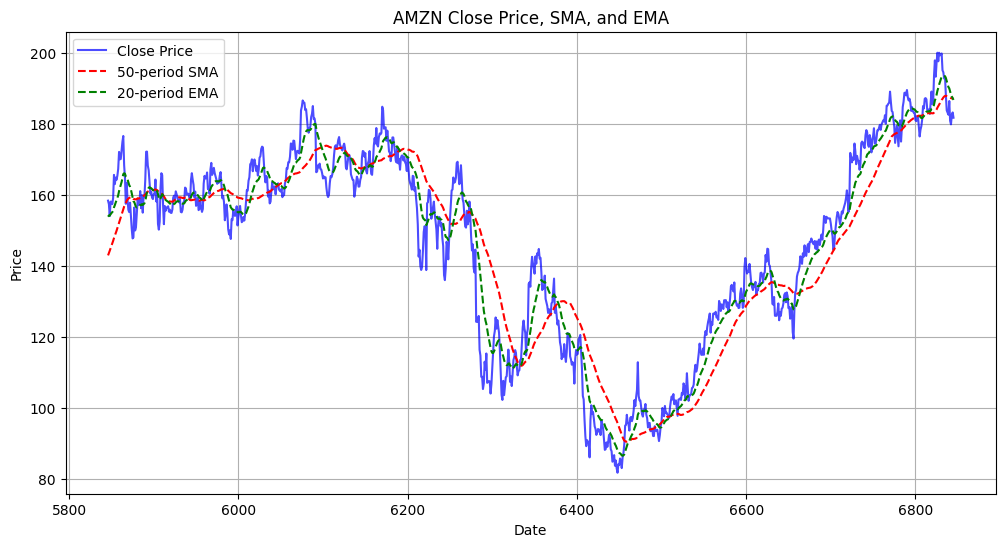

In [27]:
plot_indicators(amzn_comp,"AMZN")

In [15]:
appl_macd = calculate_MACD(appl_data)
appl_macd = appl_data.iloc[-1000:]

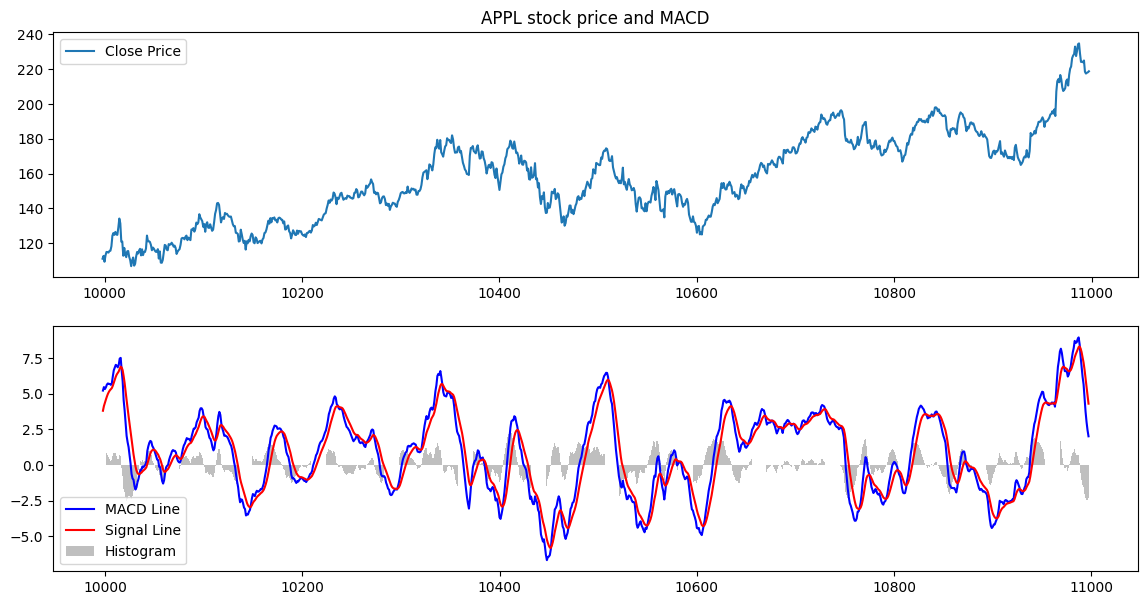

In [16]:
plot_macd(appl_macd,"APPL")

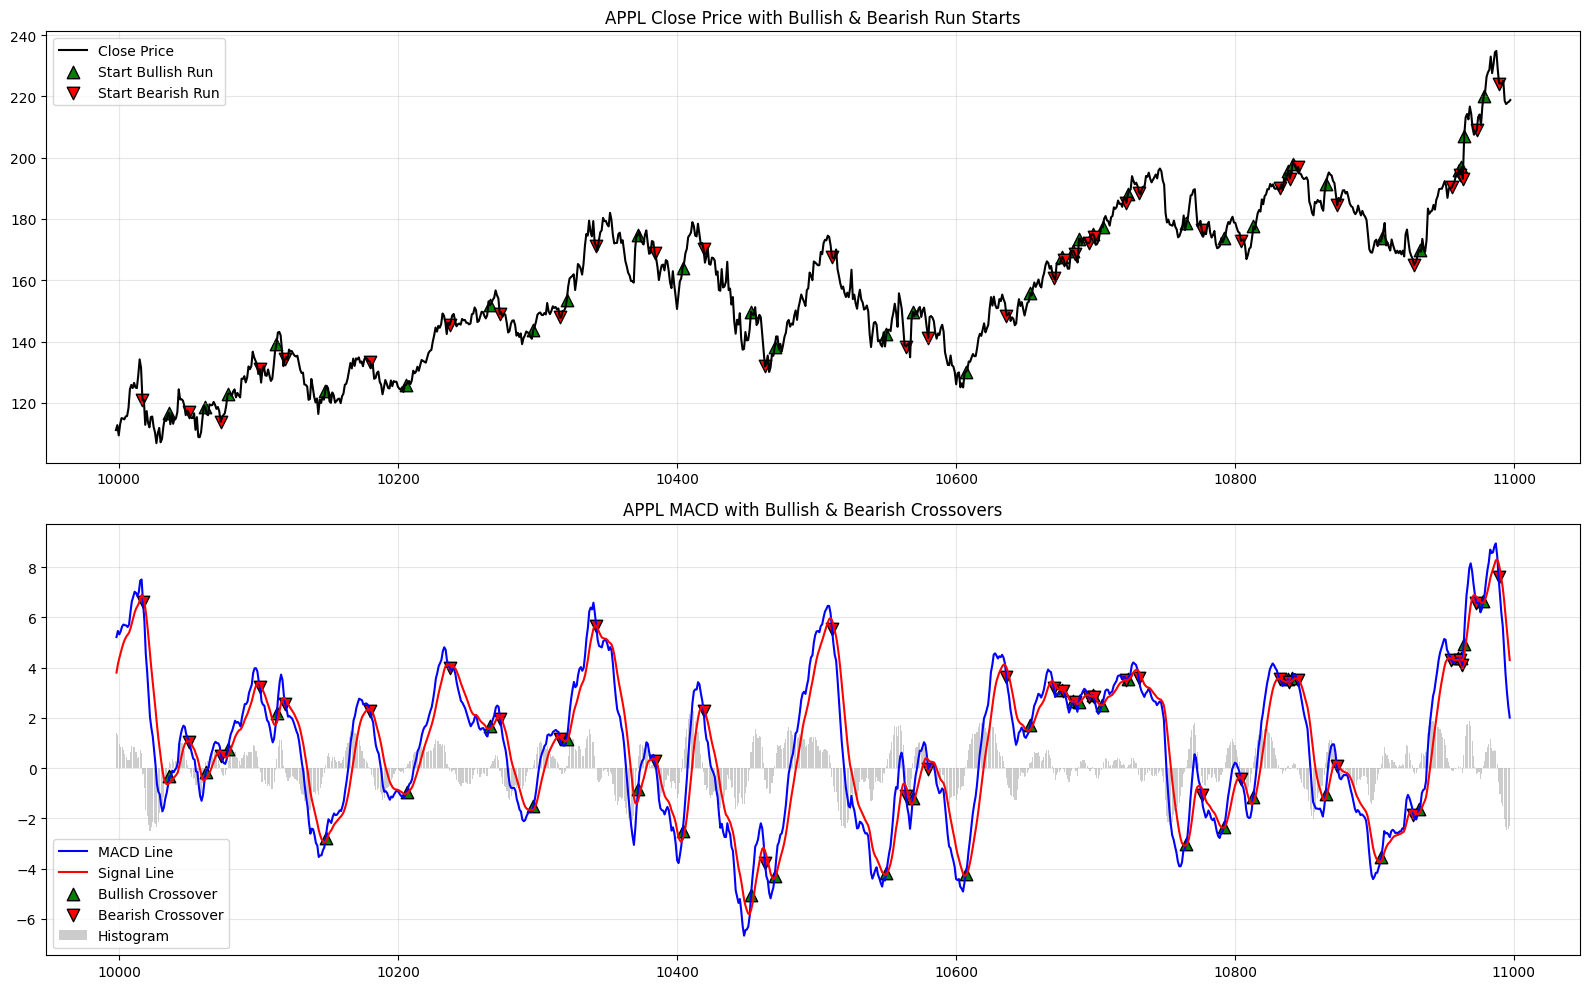

In [17]:
plot_macd_with_signals(appl_macd,"APPL")

In [18]:
amzn_macd = calculate_MACD(Amzn_data)
amzn_macd = Amzn_data.iloc[-1000:]

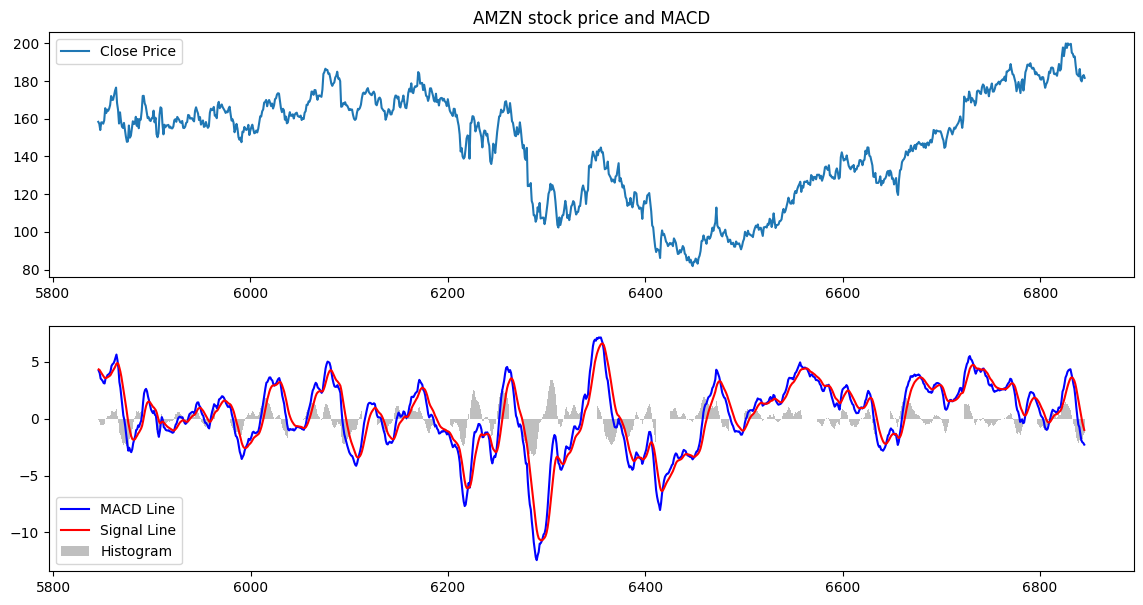

In [19]:
plot_macd(amzn_macd,"AMZN")

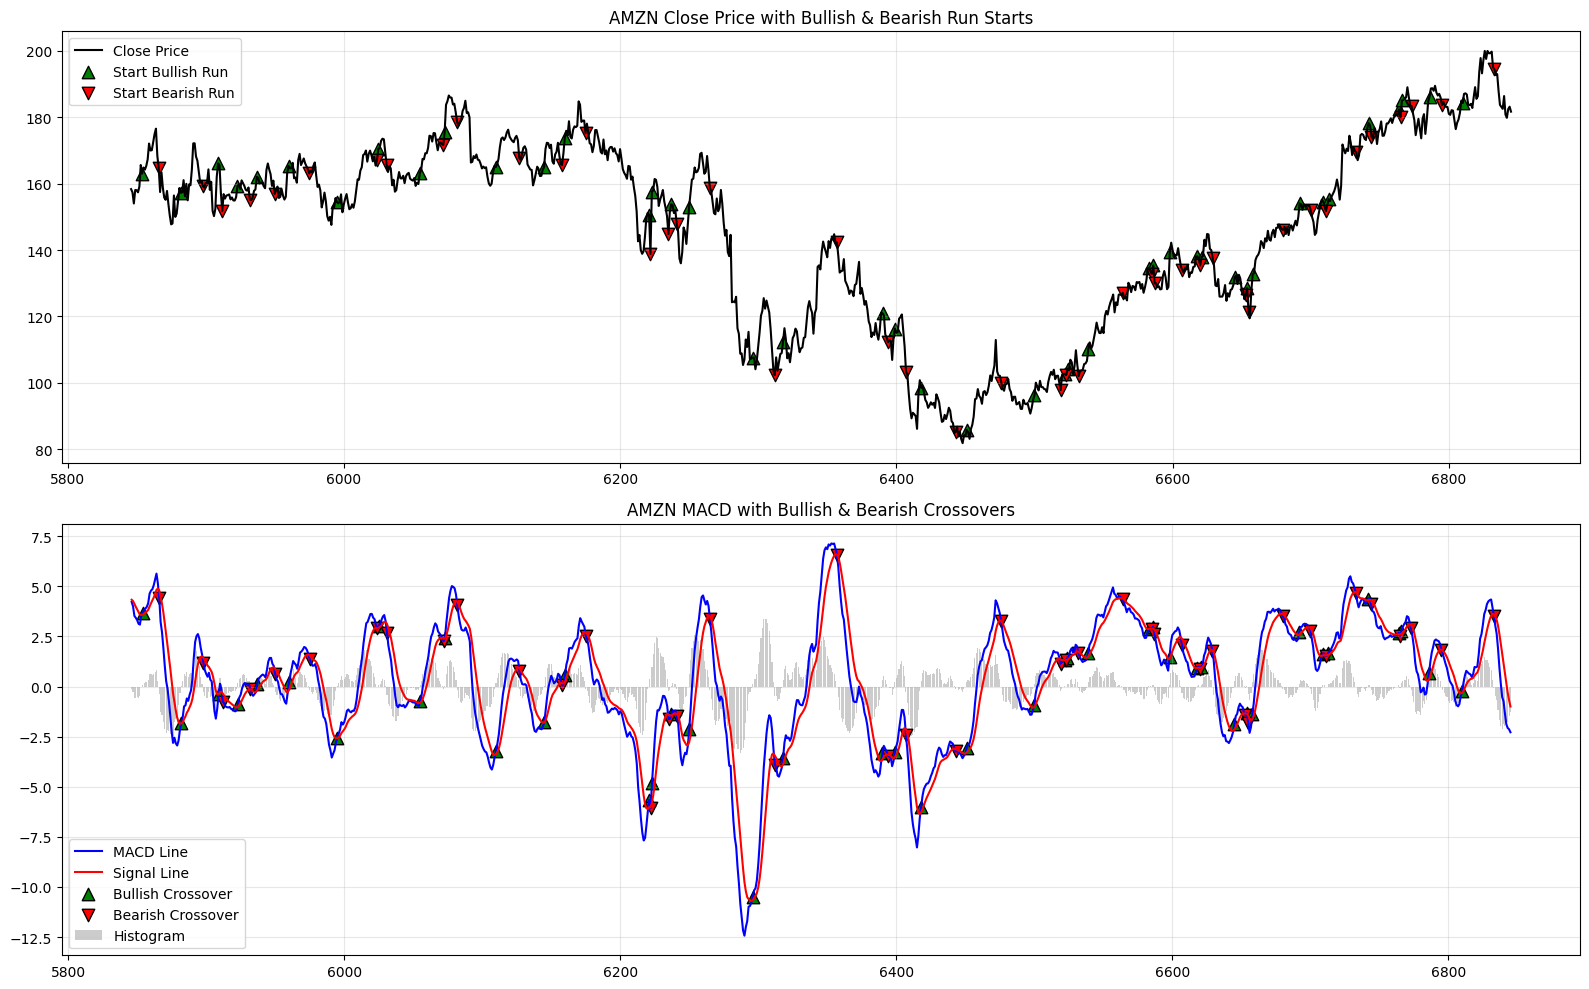

In [20]:
plot_macd_with_signals(amzn_macd,"AMZN")